In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


O teste é bicaudal, porque queremos detectar qualquer diferença, seja a favor da Estratégia A ou B.

In [3]:
# Dados das notas
notas_estrategia_A = np.array([87.64052346, 74.00157208, 79.78737984, 92.40893199, 88.6755799])
notas_estrategia_B = np.array([64.25440127, 79.64282997, 68.87033835, 60.83241379, 74.66181326])

# Cálculo das médias
media_A = np.mean(notas_estrategia_A)
media_B = np.mean(notas_estrategia_B)

# Cálculo das variâncias (não amostral)
variancia_A = np.var(notas_estrategia_A, ddof=0)
variancia_B = np.var(notas_estrategia_B, ddof=0)

# Exibição dos resultados
print(f"Média da Estratégia A: {media_A:.2f}")
print(f"Média da Estratégia B: {media_B:.2f}")
print(f"Variância da Estratégia A: {variancia_A:.2f}")
print(f"Variância da Estratégia B: {variancia_B:.2f}")


Média da Estratégia A: 84.50
Média da Estratégia B: 69.65
Variância da Estratégia A: 44.46
Variância da Estratégia B: 46.49


In [4]:
from scipy.stats import norm

# Dados das notas
notas_estrategia_A = [87.64, 74.00, 79.78, 92.40, 88.67]
notas_estrategia_B = [64.25, 79.64, 68.87, 60.83, 74.66]

# Cálculo das médias e variâncias
media_A = np.mean(notas_estrategia_A)
media_B = np.mean(notas_estrategia_B)
variancia_A = np.var(notas_estrategia_A)
variancia_B = np.var(notas_estrategia_B)

# Diferença entre as médias
diferenca_medias = media_A - media_B

# Erro padrão da diferença das médias
erro_padrao = np.sqrt((variancia_A / len(notas_estrategia_A)) + (variancia_B / len(notas_estrategia_B)))

# Estatística Z
z_stat = diferenca_medias / erro_padrao

# p-value para teste bicaudal
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Nível de significância de 5%
alpha = 0.05
rejeitar_hipotese_nula = p_value < alpha

# Exibir os resultados
print(f"Estatística Z: {z_stat:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Rejeitar a hipótese nula? {'Sim' if rejeitar_hipotese_nula else 'Não'}")


Estatística Z: 3.48
p-value: 0.0005
Rejeitar a hipótese nula? Sim


Como o p-value é muito menor que 0,05, rejeitamos a hipótese nula de que não há diferença entre as médias das duas estratégias. Isso indica que há uma diferença estatisticamente significativa no desempenho médio entre a Estratégia A e a Estratégia B.

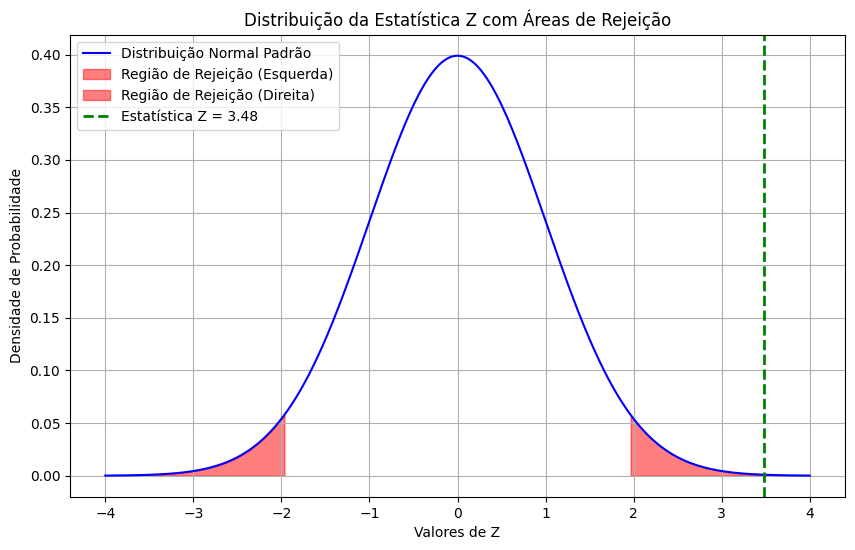

In [5]:
# Valores para o eixo X da distribuição normal padrão
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Distribuição normal padrão (média = 0, desvio padrão = 1)

# Estatística Z calculada
z_stat = 3.48
alpha = 0.05

# Limiares críticos para um teste bicaudal com nível de 5%
z_critico = norm.ppf(1 - alpha / 2)

# Plot da distribuição
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal Padrão', color='blue')

# Sombreamento das áreas de rejeição
plt.fill_between(x, y, 0, where=(x <= -z_critico), color='red', alpha=0.5, label='Região de Rejeição (Esquerda)')
plt.fill_between(x, y, 0, where=(x >= z_critico), color='red', alpha=0.5, label='Região de Rejeição (Direita)')

# Marca da estatística Z
plt.axvline(z_stat, color='green', linestyle='--', linewidth=2, label=f'Estatística Z = {z_stat:.2f}')

# Adicionando legendas e informações
plt.title('Distribuição da Estatística Z com Áreas de Rejeição')
plt.xlabel('Valores de Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


As áreas sombreadas em vermelho à esquerda e à direita representam as regiões de rejeição da hipótese nula, com base no nível de significância de 5% (2,5% em cada cauda para um teste bicaudal.O gráfico mostra que a estatística Z cai em uma das regiões críticas, confirmando que a diferença entre as médias das estratégias é estatisticamente significativa ao nível de 5%